<a href="https://colab.research.google.com/github/robinrb7/RealWorldSizing/blob/main/Real_World_reference_obj.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [1]:
# Step 1: Install necessary libraries (run this in a Colab cell)
!pip install torch torchvision torchaudio --index-url https://download.pytorch.org/whl/cu118
!pip install transformers
!pip install pillow requests supervision

Looking in indexes: https://download.pytorch.org/whl/cu118
INFO: pip is looking at multiple versions of torch to determine which version is compatible with other requirements. This could take a while.
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 23.2/23.2 MB 78.5 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 875.6/875.6 kB 50.1 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 13.1/13.1 MB 101.9 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 663.9/663.9 MB 2.7 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 417.9/417.9 MB 3.7 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 168.4/168.4 MB 7.5 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 58.1/58.1 MB 20.1 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 128.2/128.2 MB 7.4 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 204.1/204.1 MB 5.8 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 147.8/147.8 MB 6.7 MB/s e

In [2]:
!pip uninstall torch torchvision torchaudio -y

Found existing installation: torch 2.6.0+cu118
Uninstalling torch-2.6.0+cu118:
  Successfully uninstalled torch-2.6.0+cu118
Found existing installation: torchvision 0.21.0+cu124
Uninstalling torchvision-0.21.0+cu124:
  Successfully uninstalled torchvision-0.21.0+cu124
Found existing installation: torchaudio 2.6.0+cu124
Uninstalling torchaudio-2.6.0+cu124:
  Successfully uninstalled torchaudio-2.6.0+cu124


In [3]:
!pip install torch torchvision torchaudio --index-url https://download.pytorch.org/whl/cu118

Looking in indexes: https://download.pytorch.org/whl/cu118
  Using cached https://download.pytorch.org/whl/cu118/torch-2.7.0%2Bcu118-cp311-cp311-manylinux_2_28_x86_64.whl.metadata (28 kB)
  Using cached https://download.pytorch.org/whl/sympy-1.13.3-py3-none-any.whl.metadata (12 kB)
  Using cached https://download.pytorch.org/whl/triton-3.3.0-cp311-cp311-manylinux_2_27_x86_64.manylinux_2_28_x86_64.whl.metadata (1.5 kB)
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 955.6/955.6 MB 1.6 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 156.5/156.5 MB 6.7 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 6.7/6.7 MB 54.3 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 3.3/3.3 MB 55.1 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 6.2/6.2 MB 106.0 MB/s eta 0:00:00
  Attempting uninstall: triton
    Found existing installation: triton 3.2.0
    Uninstalling triton-3.2.0:
      Successfully uninstalled triton-3.2.0
  Attempting uninstall: sympy
    

In [4]:
#Step 2: Import Libraries
import torch
import numpy as np
import matplotlib.pyplot as plt
from PIL import Image, ImageDraw
import requests
import supervision as sv

# Hugging Face Transformers
from transformers import (
    AutoProcessor, AutoModelForZeroShotObjectDetection,
    SamModel, SamProcessor, AutoImageProcessor, AutoModelForDepthEstimation
)

In [5]:
#Step 3: Load Models

# Grounding DINO
model_id = "IDEA-Research/grounding-dino-base"
processor = AutoProcessor.from_pretrained(model_id)
detection_model = AutoModelForZeroShotObjectDetection.from_pretrained(model_id).to("cuda")

The secret `HF_TOKEN` does not exist in your Colab secrets.
To authenticate with the Hugging Face Hub, create a token in your settings tab (https://huggingface.co/settings/tokens), set it as secret in your Google Colab and restart your session.
You will be able to reuse this secret in all of your notebooks.
Please note that authentication is recommended but still optional to access public models or datasets.


preprocessor_config.json:   0%|          | 0.00/457 [00:00<?, ?B/s]

tokenizer_config.json:   0%|          | 0.00/1.24k [00:00<?, ?B/s]

vocab.txt:   0%|          | 0.00/232k [00:00<?, ?B/s]

tokenizer.json:   0%|          | 0.00/711k [00:00<?, ?B/s]

special_tokens_map.json:   0%|          | 0.00/125 [00:00<?, ?B/s]

config.json:   0%|          | 0.00/1.74k [00:00<?, ?B/s]

model.safetensors:   0%|          | 0.00/933M [00:00<?, ?B/s]

In [6]:
# Segment Anything Model (SAM)
sam_processor = SamProcessor.from_pretrained("facebook/sam-vit-base")
sam_model = SamModel.from_pretrained("facebook/sam-vit-base").to("cuda")

preprocessor_config.json:   0%|          | 0.00/466 [00:00<?, ?B/s]

config.json:   0%|          | 0.00/6.57k [00:00<?, ?B/s]

model.safetensors:   0%|          | 0.00/375M [00:00<?, ?B/s]

In [7]:
# Depth Anything
image_processor_id = "depth-anything/Depth-Anything-V2-Small-hf"
depth_processor = AutoImageProcessor.from_pretrained(image_processor_id)
depth_model = AutoModelForDepthEstimation.from_pretrained(image_processor_id).to("cuda")

preprocessor_config.json:   0%|          | 0.00/775 [00:00<?, ?B/s]

Using a slow image processor as `use_fast` is unset and a slow processor was saved with this model. `use_fast=True` will be the default behavior in v4.52, even if the model was saved with a slow processor. This will result in minor differences in outputs. You'll still be able to use a slow processor with `use_fast=False`.


config.json:   0%|          | 0.00/950 [00:00<?, ?B/s]

model.safetensors:   0%|          | 0.00/99.2M [00:00<?, ?B/s]

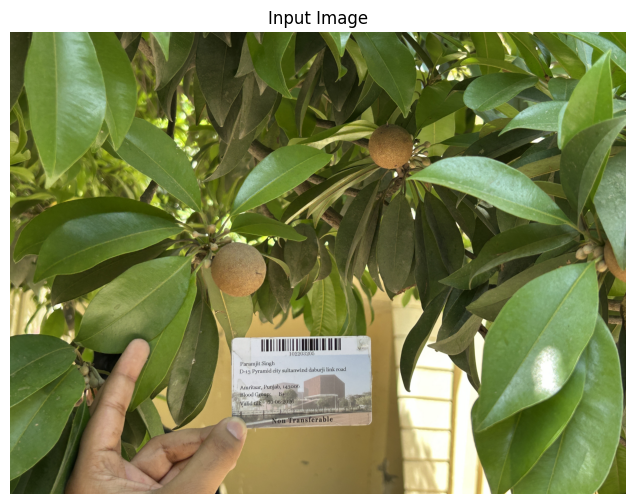

In [43]:
# Load image
image_path = "/content/cheeku_pic.jpeg"
image = Image.open(image_path).convert("RGB")


# Display
plt.figure(figsize=(8,6))
plt.imshow(image)
plt.axis('off')
plt.title("Input Image")
plt.show()


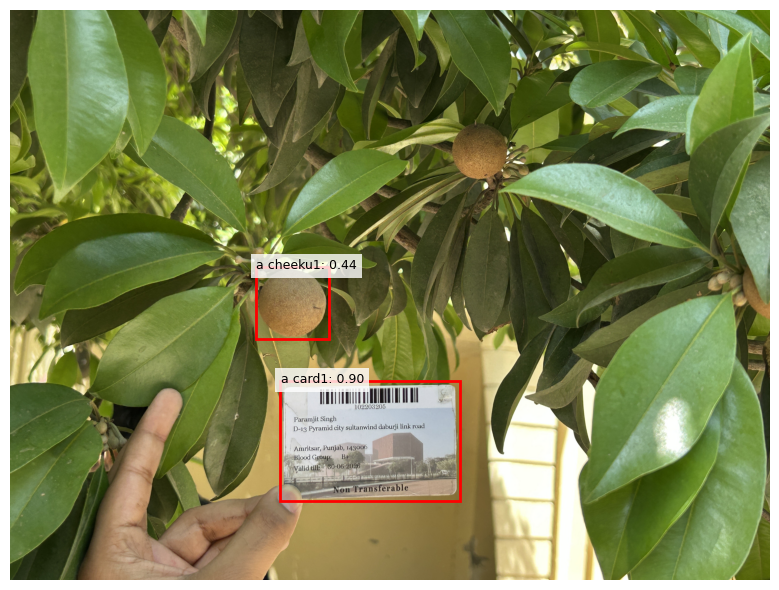

Detected 2 objects:
1. a card1 (90%)
   BBox: [1432.1, 1967.8, 2387.5, 2604.5]
2. a cheeku1 (44%)
   BBox: [1302.4, 1363.1, 1690.1, 1743.3]


In [44]:
from collections import defaultdict

# Step 1: Define text prompts
text_prompts = "a cheeku. a card."  # Use lowercase and period-separated

# Step 2: Prepare inputs
inputs = processor(images=image, text=text_prompts, return_tensors="pt").to("cuda")

# Step 3: Run model inference
with torch.no_grad():
    outputs = detection_model(**inputs)

# Step 4: Post-process results with adjusted threshold
results = processor.post_process_grounded_object_detection(
    outputs,
    inputs.input_ids,
    box_threshold=0.27,
    text_threshold=0.30,  # Lowered threshold to catch more labels
    target_sizes=torch.tensor([image.size[::-1]]).to("cuda")
)

# Step 5: Extract detection data
boxes = results[0]["boxes"].cpu().numpy()
scores = results[0]["scores"].cpu().numpy()
raw_labels = results[0]["text_labels"]

# Step 6: Clean labels and assign "unknown" if blank
cleaned_labels = []
for label in raw_labels:
    if isinstance(label, str) and label.strip() != "":
        cleaned_labels.append(label.strip())
    else:
        cleaned_labels.append("unknown")

# Step 7: Add numbering to labels (e.g., mango1, mango2, unknown1)
label_counter = defaultdict(int)
numbered_labels = []
for text in cleaned_labels:
    label_counter[text] += 1
    numbered_labels.append(f"{text}{label_counter[text]}")

# Step 8: Visualize detections
plt.figure(figsize=(10, 6))
plt.imshow(image)

for box, label, score in zip(boxes, numbered_labels, scores):
    x1, y1, x2, y2 = box
    plt.gca().add_patch(plt.Rectangle(
        (x1, y1), x2 - x1, y2 - y1,
        fill=False, color='red', linewidth=2, linestyle='-'
    ))
    plt.text(x1 + 3, y1 + 12, f"{label}: {score:.2f}",
             fontsize=9, color='black',
             bbox=dict(facecolor='white', alpha=0.8, edgecolor='none'))

plt.axis('off')
plt.tight_layout()
plt.show()

# Step 9: Print detection summary
print(f"Detected {len(cleaned_labels)} objects:")
for i, (label, score, (x1, y1, x2, y2)) in enumerate(zip(numbered_labels, scores, boxes)):
    print(f"{i + 1}. {label} ({score:.0%})")
    print(f"   BBox: [{x1:.1f}, {y1:.1f}, {x2:.1f}, {y2:.1f}]")


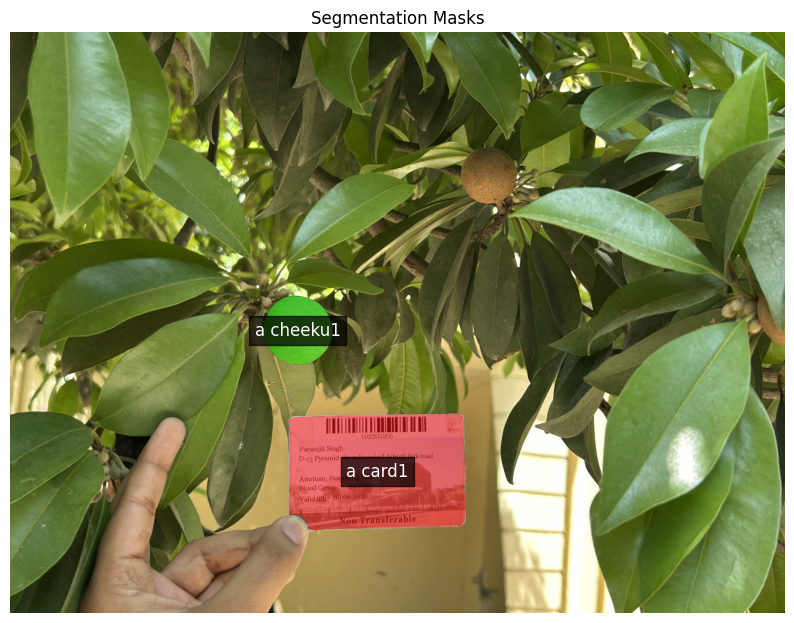

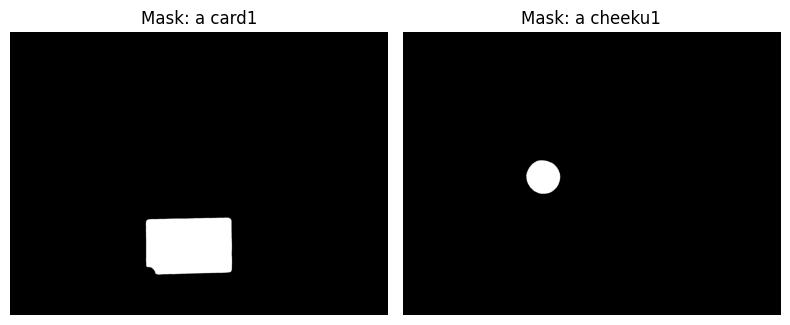

In [45]:
import math

# Step 1: Convert bounding boxes to SAM format
def boxes_to_sam_format(boxes):
    return [[x1, y1, x2, y2] for x1, y1, x2, y2 in boxes]

input_boxes = boxes_to_sam_format(boxes)

# Step 2: Prepare input for SAM
sam_inputs = sam_processor(
    image,
    input_boxes=[input_boxes],  # Batch of boxes
    return_tensors="pt"
).to("cuda")

# Step 3: Run SAM inference
with torch.no_grad():
    sam_outputs = sam_model(**sam_inputs)

# Step 4: Post-process masks
masks = sam_processor.image_processor.post_process_masks(
    sam_outputs.pred_masks.cpu(),
    sam_inputs["original_sizes"].cpu(),
    sam_inputs["reshaped_input_sizes"].cpu()
)[0]

# Step 5: Convert masks to binary
final_masks = [masks[i, 0].numpy() > 0.0 for i in range(masks.shape[0])]


# Step 6: Visualize masks with detection labels
plt.figure(figsize=(10, 8))
plt.imshow(np.array(image))

colors = ['red', 'green', 'blue', 'cyan', 'magenta', 'yellow']
color_values = {
    'red': [1, 0, 0, 0.5],
    'green': [0, 1, 0, 0.5],
    'blue': [0, 0, 1, 0.5],
    'cyan': [0, 1, 1, 0.5],
    'magenta': [1, 0, 1, 0.5],
    'yellow': [1, 1, 0, 0.5]
}

# Use detection labels directly
for i, (mask, label) in enumerate(zip(final_masks, numbered_labels)):
    color = colors[i % len(colors)]
    color_mask = np.zeros((*mask.shape, 4))  # RGBA
    color_mask[mask] = color_values[color]

    plt.imshow(color_mask)

    # Place label at the center of the mask
    y, x = np.where(mask)
    if len(x) > 0 and len(y) > 0:
        cx, cy = int(np.mean(x)), int(np.mean(y))
        plt.text(cx, cy, label, fontsize=12, color='white',
                 bbox=dict(facecolor='black', alpha=0.7),
                 ha='center', va='center')

plt.axis('off')
plt.title("Segmentation Masks")
plt.show()

# Step 7: Plot each mask individually
num_masks = len(final_masks)
cols = min(num_masks, 3)
rows = math.ceil(num_masks / cols)

plt.figure(figsize=(cols * 4, rows * 4))
for i, (mask, label) in enumerate(zip(final_masks, numbered_labels)):
    plt.subplot(rows, cols, i + 1)
    plt.imshow(mask, cmap='gray')
    plt.title(f"Mask: {label}")
    plt.axis('off')
plt.tight_layout()
plt.show()

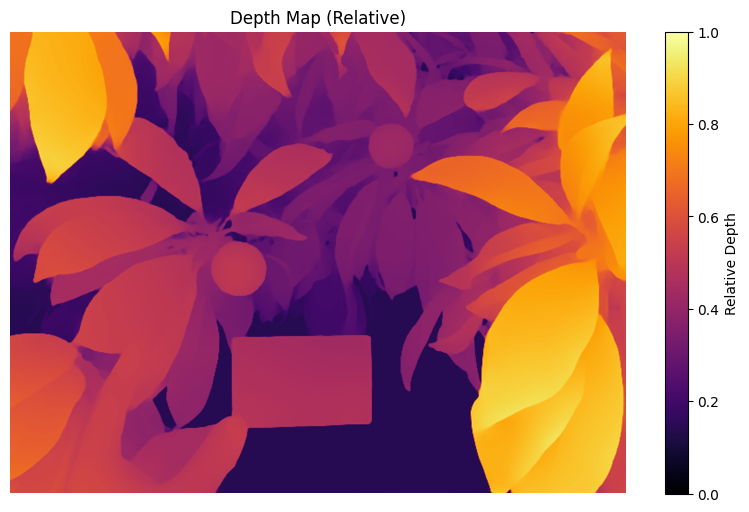

In [46]:
# Prepare the image for depth estimation
depth_inputs = depth_processor(images=image, return_tensors="pt").to("cuda")

# Run the depth model
with torch.no_grad():
    depth_outputs = depth_model(**depth_inputs)
    predicted_depth = depth_outputs.predicted_depth

# Resize the depth map to match your image size
depth_map = torch.nn.functional.interpolate(
    predicted_depth.unsqueeze(1),
    size=image.size[::-1],  # (height, width)
    mode="bicubic",
    align_corners=False
).squeeze().cpu().numpy()


# Normalize depth map for visualization
depth_map_normalized = (depth_map - depth_map.min()) / (depth_map.max() - depth_map.min())

# Visualize the depth map
plt.figure(figsize=(10, 6))
plt.imshow(depth_map_normalized, cmap='inferno')
plt.axis('off')
plt.title("Depth Map (Relative)")
plt.colorbar(label='Relative Depth')
plt.show()


In [47]:
import cv2
# Convert disparity to depth (meters) and denoise
depth_map = 1.0 / (depth_map + 1e-8)
depth_map = cv2.medianBlur(depth_map.astype(np.float32), 3)


# Step 5: Reference Object Calibration
# 1. Identify the reference object (blue spray bottle)
# Use the updated label from object detection (consider using the numbered label)
REFERENCE_LABEL = "a card1"  # Adjust based on your updated detection labels, e.g., 'a card1'
ref_idx = numbered_labels.index(REFERENCE_LABEL)  # Use numbered labels here
ref_mask = final_masks[ref_idx]
ref_box = boxes[ref_idx]


# Known dimensions of the blue spray bottle (in centimeters)
# Adjust these measurements to match your actual spray bottle
REF_REAL_WIDTH = 8.5   # cm
REF_REAL_HEIGHT = 5.3  # cm

# Calculate pixel dimensions of reference object using the mask
y_ref, x_ref = np.where(ref_mask)
ref_pixel_width = x_ref.max() - x_ref.min()
ref_pixel_height = y_ref.max() - y_ref.min()

# Calculate pixels-per-cm ratio
pixels_per_cm_width = ref_pixel_width / REF_REAL_WIDTH
pixels_per_cm_height = ref_pixel_height / REF_REAL_HEIGHT

# Get depth value at reference object center
ref_center_y, ref_center_x = int(np.mean(y_ref)), int(np.mean(x_ref))
ref_depth = depth_map[ref_center_y, ref_center_x]

# Display reference object info
print(f"Reference Object: {REFERENCE_LABEL}")
print(f"Real dimensions: {REF_REAL_WIDTH}cm × {REF_REAL_HEIGHT}cm")
print(f"Pixel dimensions: {ref_pixel_width}px × {ref_pixel_height}px")
print(f"Conversion ratio: {pixels_per_cm_width:.2f}px/cm (width), {pixels_per_cm_height:.2f}px/cm (height)")
print(f"Reference depth: {ref_depth:.4f}")

Reference Object: a card1
Real dimensions: 8.5cm × 5.3cm
Pixel dimensions: 918px × 606px
Conversion ratio: 108.00px/cm (width), 114.34px/cm (height)
Reference depth: 0.5271


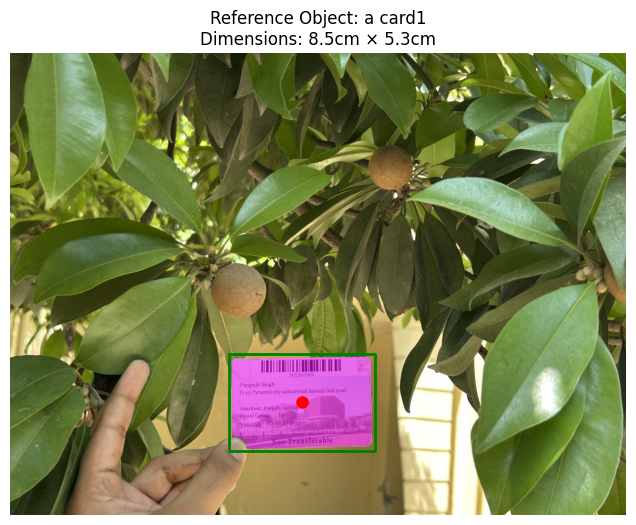

In [48]:
# Visualize the reference object
plt.figure(figsize=(10, 6))
plt.imshow(np.array(image))
plt.imshow(np.ma.masked_where(~ref_mask, ref_mask), alpha=0.5, cmap='spring')
x1, y1, x2, y2 = ref_box.tolist()
plt.plot([x1, x2, x2, x1, x1], [y1, y1, y2, y2, y1], 'g-', linewidth=2)
plt.plot(ref_center_x, ref_center_y, 'ro', markersize=8)
plt.title(f"Reference Object: {REFERENCE_LABEL}\nDimensions: {REF_REAL_WIDTH}cm × {REF_REAL_HEIGHT}cm")
plt.axis('off')
plt.show()

In [49]:
from collections import defaultdict
from matplotlib.colors import ListedColormap

# Store results
results = []

# To track counts of each object label (we don't need this anymore as numbered labels are already handled)
label_counts = defaultdict(int)

# Iterate over the masks and labels
for i, (mask, label) in enumerate(zip(final_masks, numbered_labels)):  # Use numbered_labels here
    if not np.any(mask):  # Skip empty masks
        continue

    # Get coordinates of the mask
    y_obj, x_obj = np.where(mask)
    pixel_width = x_obj.max() - x_obj.min()
    pixel_height = y_obj.max() - y_obj.min()

   # Robust depth calculation
    obj_depth = np.percentile(depth_map[mask], 75)
    if obj_depth < 0.1:  # Skip objects closer than 10cm
        continue

    # Skip if depth is zero (invalid data)
    if obj_depth == 0:
        continue

    # Use the reference depth for scaling
    depth_ratio = ref_depth / obj_depth
    real_width = pixel_width / (pixels_per_cm_width * depth_ratio)
    real_height = pixel_height / (pixels_per_cm_height * depth_ratio)

    # Convert depth to centimeters
    distance_cm = round(obj_depth * 100, 1)  # Assuming depth in meters

    # Store the result with object dimensions and depth info
    results.append({
        "object": label,  # Use the updated numbered label
        "width_cm": round(real_width, 1),
        "height_cm": round(real_height, 1),
        "depth_value": float(obj_depth),
        "distance_cm": distance_cm
    })


In [50]:
# Print results
print("\nObject Measurements:")
print("-" * 60)
print(f"{'Object':<15} {'Width (cm)':<12} {'Height (cm)':<12} {'Distance (cm)':<15}")
print("-" * 60)
for result in results:
    print(f"{result['object']:<15} {result['width_cm']:<12.1f} {result['height_cm']:<12.1f} {result['distance_cm']:<15.1f}")


Object Measurements:
------------------------------------------------------------
Object          Width (cm)   Height (cm)  Distance (cm)  
------------------------------------------------------------
a card1         8.7          5.4          54.1           
a cheeku1       3.1          2.9          49.0           


In [ ]:
# Visualize all objects with their calculated dimensions
plt.figure(figsize=(12, 8))
plt.imshow(np.array(image))

for i, (mask, result) in enumerate(zip(final_masks, results)):
    # Get object center
    y_obj, x_obj = np.where(mask)
    if len(y_obj) == 0 or len(x_obj) == 0:
        continue

    obj_center_y, obj_center_x = int(np.mean(y_obj)), int(np.mean(x_obj))

    # Color: green for reference, red for others
    color = 'lime' if result['object'] == REFERENCE_LABEL else 'red'

    # Display mask with transparency and color
    plt.imshow(np.ma.masked_where(~mask, mask), alpha=0.3, cmap=plt.cm.colors.ListedColormap([color]))

    # Add dimension text
    plt.text(obj_center_x, obj_center_y,
             f"{result['object']}\n{result['width_cm']}×{result['height_cm']} cm\n{result['distance_cm']:.2f}cm",
             color='white', fontsize=9, ha='center', va='center',
             bbox=dict(facecolor='black', alpha=0.7))

plt.title("Calculated Object Dimensions")
plt.axis('off')
plt.show()


Results


In [ ]:
# Ground truth configuration
GT_MANGOES = 7
REF_CARD_DIMENSIONS = {'width': 8.5, 'height': 5.3}  # cm


# Part 1: Detection Metrics Calculation
# Convert detection results to binary classification
true_positives = sum(1 for label in numbered_labels if label.startswith("a mango"))
false_positives = sum(1 for label in numbered_labels if "unknown" in label)
false_negatives = GT_MANGOES - true_positives

precision = true_positives / (true_positives + false_positives)
recall = true_positives / GT_MANGOES
f1_score = 2 * (precision * recall) / (precision + recall)

print(f"""
Detection Performance:
- Precision: {precision:.2f} ({true_positives}/{(true_positives + false_positives)})
- Recall: {recall:.2f} ({true_positives}/{GT_MANGOES})
- F1 Score: {f1_score:.2f}
""")

In [ ]:
import matplotlib.pyplot as plt
import numpy as np
import pandas as pd


# Ground truth dimensions for mangoes only
gt_dimensions = {
    'a mango1': {'width': 3.1, 'height': 3.6},
    'a mango2': {'width': 2.6, 'height': 3.9},
    'a mango3': {'width': 2.2, 'height': 4.0},
    'a mango4': {'width': 2.38, 'height': 3.9},
}

# Filter out reference and unknown objects
filtered_results = [r for r in results if r['object'].startswith('a mango') and r['object'] in gt_dimensions]

# Prepare data for error table
error_data = []
for res in filtered_results:
    label = res['object']
    pred_w = res['width_cm']
    pred_h = res['height_cm']
    gt_w = gt_dimensions[label]['width']
    gt_h = gt_dimensions[label]['height']
    error_w = pred_w - gt_w
    error_h = pred_h - gt_h
    error_data.append({
        'Label': label,
        'Predicted Width (cm)': round(pred_w, 2),
        'GT Width (cm)': gt_w,
        'Width Error (cm)': round(error_w, 2),
        'Predicted Height (cm)': round(pred_h, 2),
        'GT Height (cm)': gt_h,
        'Height Error (cm)': round(error_h, 2)
    })

# Convert to DataFrame
error_df = pd.DataFrame(error_data)

# Print error table
print("Error Table:")
print(error_df.to_string(index=False))




In [ ]:

# Using the same data as before
filtered_results = [r for r in results if r['object'].startswith('a mango')]

# Create a DataFrame for easier manipulation
plot_data = pd.DataFrame({
    'Object': [r['object'] for r in filtered_results],
    'Predicted Width': [r['width_cm'] for r in filtered_results],
    'Ground Truth Width': [gt_dimensions[r['object']]['width'] for r in filtered_results],
    'Predicted Height': [r['height_cm'] for r in filtered_results],
    'Ground Truth Height': [gt_dimensions[r['object']]['height'] for r in filtered_results]
})

# Set up the figure with two subplots side by side
fig, (ax1, ax2) = plt.subplots(1, 2, figsize=(14, 6))

# Width comparison plot
bar_width = 0.35
indices = np.arange(len(plot_data))

# Plot width comparison
width_bars1 = ax1.bar(indices, plot_data['Ground Truth Width'], bar_width,
                     label='Ground Truth', color='#3498db', edgecolor='black')
width_bars2 = ax1.bar(indices + bar_width, plot_data['Predicted Width'], bar_width,
                     label='Predicted', color='#f39c12', edgecolor='black')

# Add value labels on each bar
for bar in width_bars1:
    height = bar.get_height()
    ax1.text(bar.get_x() + bar.get_width()/2., height + 0.05,
             f'{height:.1f}', ha='center', va='bottom', fontsize=9)

for bar in width_bars2:
    height = bar.get_height()
    ax1.text(bar.get_x() + bar.get_width()/2., height + 0.05,
             f'{height:.1f}', ha='center', va='bottom', fontsize=9)

# Customize width plot
ax1.set_ylabel('Width (cm)', fontweight='bold')
ax1.set_title('Object Width Comparison', fontweight='bold')
ax1.set_xticks(indices + bar_width/2)
ax1.set_xticklabels(plot_data['Object'], rotation=0)
ax1.grid(axis='y', linestyle='--', alpha=0.4)
ax1.set_ylim(0, max(plot_data['Ground Truth Width'].max(),
                    plot_data['Predicted Width'].max()) * 1.15)

# Height comparison plot
height_bars1 = ax2.bar(indices, plot_data['Ground Truth Height'], bar_width,
                      label='Ground Truth', color='#3498db', edgecolor='black')
height_bars2 = ax2.bar(indices + bar_width, plot_data['Predicted Height'], bar_width,
                      label='Predicted', color='#f39c12', edgecolor='black')

# Add value labels on each bar
for bar in height_bars1:
    height = bar.get_height()
    ax2.text(bar.get_x() + bar.get_width()/2., height + 0.05,
             f'{height:.1f}', ha='center', va='bottom', fontsize=9)

for bar in height_bars2:
    height = bar.get_height()
    ax2.text(bar.get_x() + bar.get_width()/2., height + 0.05,
             f'{height:.1f}', ha='center', va='bottom', fontsize=9)

# Customize height plot
ax2.set_ylabel('Height (cm)', fontweight='bold')
ax2.set_title('Object Height Comparison', fontweight='bold')
ax2.set_xticks(indices + bar_width/2)
ax2.set_xticklabels(plot_data['Object'], rotation=0)
ax2.grid(axis='y', linestyle='--', alpha=0.4)
ax2.set_ylim(0, max(plot_data['Ground Truth Height'].max(),
                   plot_data['Predicted Height'].max()) * 1.15)

# Add a single legend for both subplots
fig.legend(['Ground Truth', 'Predicted'], loc='upper center',
           bbox_to_anchor=(0.5, 0.05), ncol=2, frameon=True, fontsize=10)

plt.tight_layout(rect=[0, 0.07, 1, 0.97])
plt.suptitle('Dimension Estimation Accuracy', fontsize=16, fontweight='bold')
plt.show()
